In [26]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as met
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso


In [27]:
df = pd.read_csv(r'diamonds.csv',index_col=0)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [28]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [29]:
df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [30]:
df['cut'] = df['cut'].map({'Ideal': 1, 'Premium': 2, 'Very Good': 3, 'Good': 4, 'Fair': 5})

In [31]:
df['cut']

1        1
2        2
3        4
4        2
5        4
        ..
53936    1
53937    4
53938    3
53939    2
53940    1
Name: cut, Length: 53940, dtype: int64

In [32]:
df['color'].value_counts()


G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [33]:
df['color'] = df['color'].map({'D': 1, 'E': 2, 'F': 3, 'G': 4, 'H': 5, 'I': 6, 'J': 7})


In [34]:
df['color'].value_counts()

4    11292
2     9797
3     9542
5     8304
1     6775
6     5422
7     2808
Name: color, dtype: int64

In [35]:
df['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [36]:
df['clarity'] = df['clarity'].map({'IF': 1, 'VVS1': 2, 'VVS2': 3, 'VS1': 4, 'VS2': 5, 'SI1': 6, 'SI2': 7 , 'I1' : 8})

In [37]:
df.describe

<bound method NDFrame.describe of        carat  cut  color  clarity  depth  table  price     x     y     z
1       0.23    1      2        7   61.5   55.0    326  3.95  3.98  2.43
2       0.21    2      2        6   59.8   61.0    326  3.89  3.84  2.31
3       0.23    4      2        4   56.9   65.0    327  4.05  4.07  2.31
4       0.29    2      6        5   62.4   58.0    334  4.20  4.23  2.63
5       0.31    4      7        7   63.3   58.0    335  4.34  4.35  2.75
...      ...  ...    ...      ...    ...    ...    ...   ...   ...   ...
53936   0.72    1      1        6   60.8   57.0   2757  5.75  5.76  3.50
53937   0.72    4      1        6   63.1   55.0   2757  5.69  5.75  3.61
53938   0.70    3      1        6   62.8   60.0   2757  5.66  5.68  3.56
53939   0.86    2      5        7   61.0   58.0   2757  6.15  6.12  3.74
53940   0.75    1      1        7   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]>

In [38]:
y = df ['price'] 

In [39]:
y

1         326
2         326
3         327
4         334
5         335
         ... 
53936    2757
53937    2757
53938    2757
53939    2757
53940    2757
Name: price, Length: 53940, dtype: int64

In [40]:
x = df.loc[:,(df.columns != 'price')]
x

,carat,cut,color,clarity,depth,table,x,y,z
1,0.23,1,2,7,61.5,55.0,3.95,3.98,2.43
2,0.21,2,2,6,59.8,61.0,3.89,3.84,2.31
3,0.23,4,2,4,56.9,65.0,4.05,4.07,2.31
4,0.29,2,6,5,62.4,58.0,4.20,4.23,2.63
5,0.31,4,7,7,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53936,0.72,1,1,6,60.8,57.0,5.75,5.76,3.50
53937,0.72,4,1,6,63.1,55.0,5.69,5.75,3.61
53938,0.70,3,1,6,62.8,60.0,5.66,5.68,3.56
53939,0.86,2,5,7,61.0,58.0,6.15,6.12,3.74


In [41]:
xtrain,xtest,ytrain,ytest =train_test_split(x, y, test_size = 0.30, random_state = 42)

In [42]:
model = LinearRegression()
df.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,2.095903,3.594197,4.948980,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.116600,1.701105,1.647136,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,1.000000,2.000000,4.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,4.000000,5.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,5.000000,6.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,5.000000,7.000000,8.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [43]:
model.fit(xtrain, ytrain)

LinearRegression()

In [44]:
ypred = model.predict(xtest)

In [45]:
mean_absolute_error(ytest, ypred)

802.2014845937433

In [46]:
met.mean_squared_error(ytest, ypred)

1442900.0148202025

Text(0.5, 1.0, 'Price vs Predicted Price')

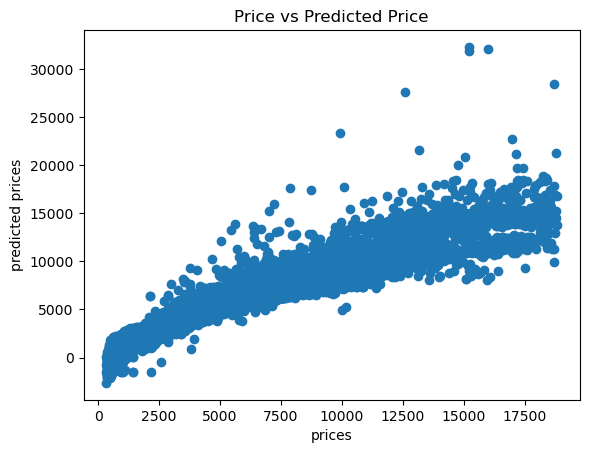

In [47]:
plt.scatter(ytest,ypred)


plt.xlabel('prices')
plt.ylabel('predicted prices')
plt.title('Price vs Predicted Price')


In [63]:
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('lasso', Lasso(alpha=0.1))
])

In [64]:
pipe.fit(x , y)

Pipeline(steps=[('scaler', StandardScaler()), ('lasso', Lasso(alpha=0.1))])

In [65]:
c = pipe.named_steps['lasso'].coef_


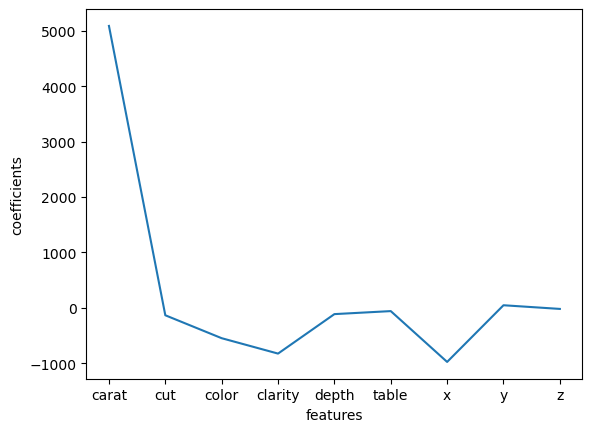

In [74]:
plt.plot(range(9),c)
plt.xticks(range(9),x)
plt.ylabel('coefficients')
plt.xlabel('features');